**Question 7**

In [470]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [421]:
mdic = loadmat("hw02_dataset.mat")

In [422]:
X_trn = mdic["X_trn"]
X_tst = mdic["X_tst"]
Y_trn = mdic["Y_trn"]
Y_tst = mdic["Y_tst"]

In [423]:
print(X_trn.shape, Y_trn.shape , X_tst.shape  , Y_tst.shape)

(126, 2) (126, 1) (14, 2) (14, 1)


**Sigmoid Function**

In [424]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

**Logistic Regression with Gradient Descent Function(Part a)**

In [425]:
def fit_log_reg(X , y , lr = 0.001 , max_iters = 1000):
    n_samples , n_features = X.shape
    # Initializing weights and bias to 0
    weights = np.zeros((n_features,1))
    bias = 0
    
    # Gradient Descent
    for i in range(max_iters):
        z = np.dot(X , weights) + bias
        y_hat = sigmoid(z).reshape(n_samples,1)
        
        dw = (1 / n_samples) * np.dot(X.T , (y_hat - y))
        db = (1 / n_samples) * np.sum(y_hat - y)
        weights -= (lr * dw)
        bias -= lr * db
        
    return weights , bias

**Prediction Function**

In [426]:
def predict(X , weights , bias):
    
    z = np.dot(X , weights) + bias
    y_hat = sigmoid(z)
    y_hat_class = []
    for i in y_hat:
        if i>0.5:
            y_hat_class.append(1)
        else:
            y_hat_class.append(0)
    
    #y_hat_class = [0 if i<=0.5 else 0 for i in y_hat]
    
    return y_hat_class

**Accuracy Function**

In [427]:
def accuracy(y_true , y_hat):
    y_true = list(y_true.flatten())
    matches =0
    for i in range(len(y_true)):
        if y_true[i] == y_hat[i]:
            matches += 1
    
    return matches/len(y_true)

**Running the code on training dataset (Part b)**

In [428]:
reg1 = fit_log_reg(X_trn , Y_trn, 0.001 , 10000)

**Printing weights and bias values**

In [429]:
w = reg1[0]
b = reg1[1]
print(w)
print(b)

[[ 1.87052543]
 [-0.40398836]]
0.42417768861279515


**Printing Predicted and Actual Class Labels (Training Data)**

In [430]:
y_pred = predict(X_trn , w , b)
print("Predicted Classes (Training Data):")
print(y_pred)
print("Actual Classes (Training Data):")
print(list(Y_trn.flatten()))

Predicted Classes (Training Data):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Actual Classes (Training Data):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


**Classification error on training set**

In [431]:
print("Accuracy for training data is: " , accuracy(Y_trn , y_pred))
print("Classification Error (Training Data): " , 1 - accuracy(Y_trn , y_pred))

Accuracy for training data is:  0.9682539682539683
Classification Error (Training Data):  0.031746031746031744


**Printing Predicted and Actual Class Labels (Testing Data)**

In [432]:
y2_pred = predict(X_tst , w ,b)
print("Predicted Classes (Test Data):")
print(y2_pred)
print("Actual Classes (Test Data):")
print(list(Y_tst.flatten()))

Predicted Classes (Test Data):
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]
Actual Classes (Test Data):
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


**Classification error on testing set**

In [433]:
print("Accuracy for test data is: " , accuracy(Y_tst , y2_pred))
print("Classification Error (Test Data): " , 1 - accuracy(Y_tst , y2_pred))

Accuracy for test data is:  0.9285714285714286
Classification Error (Test Data):  0.0714285714285714


**Plotting the data and decision boundary for testing data**

Text(0.5, 1.0, 'Testing Data - Logistic Regression')

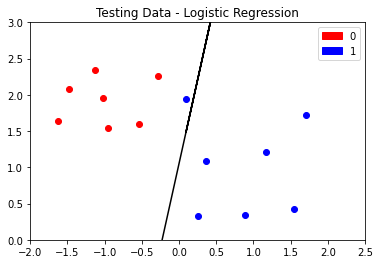

In [486]:
for a,class_pt in zip(X_tst , Y_tst):
    if class_pt == 1:
        plt.scatter(a[0] , a[1] , color = 'blue')
    else:
        plt.scatter(a[0] , a[1] , color = 'red' )
        


w1 = w[0][0]
w2 = w[1][0]
w0 = b
db = X_tst.T[0]

red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')

decision_boundary = -(w0 + w1 * db)/w2
plt.plot(db , decision_boundary , color = 'black')
plt.ylim(0,3)
plt.xlim(-2,2.5)
plt.legend(handles = [red_patch , blue_patch])
plt.title("Testing Data - Logistic Regression")

**Plotting the data and decision boundary for testing data**

Text(0.5, 1.0, 'Training Data - Logistic Regression')

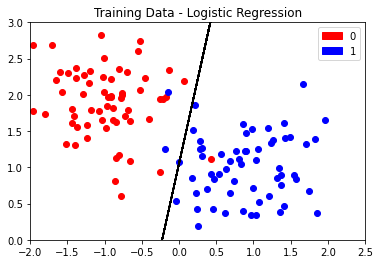

In [487]:
for a1,class_pt1 in zip(X_trn , Y_trn):
    if class_pt1 == 1:
        plt.scatter(a1[0] , a1[1] , color = 'blue')
    else:
        plt.scatter(a1[0] , a1[1] , color = 'red' )
        


w11 = w[0][0]
w21 = w[1][0]
w01 = b
db1 = X_trn.T[0]

red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')

decision_boundary1 = -(w01 + w11 * db1)/w21
plt.plot(db1 , decision_boundary1 , color = 'black')
plt.ylim(0,3)
plt.xlim(-2,2.5)
plt.legend(handles = [red_patch , blue_patch])
plt.title("Training Data - Logistic Regression")